In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import json
import datetime
%matplotlib inline
import time
import os

from datetime import datetime
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud import bigquery

#credentials = service_account.Credentials.from_service_account_file('foo')
#os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = 'bar'

# The style of the figure can be set globally using the matplotlib rc parameters.
plt.rcParams['axes.grid'] = True
plt.rcParams["figure.figsize"] = [10,6]

import networkx as nx
ntw = nx.read_edgelist('ntw.txt')

## Network analysis

[nb_nodes, nb_edges, avg_degree]:  [4039, 88234, 43.69101262688784]


,degrees
count,4039.000000
mean,43.691013
std,52.420605
min,1.000000
25%,11.000000
50%,25.000000
75%,57.000000
max,1045.000000
0.05,3.000000
0.99,199.620000


    We notice from the above summary statistics that we have on 
    average a degree of  43.69 
    with a median at  25.0 degrees, 
    highlighting the effect of a high standard deviation of  52.42


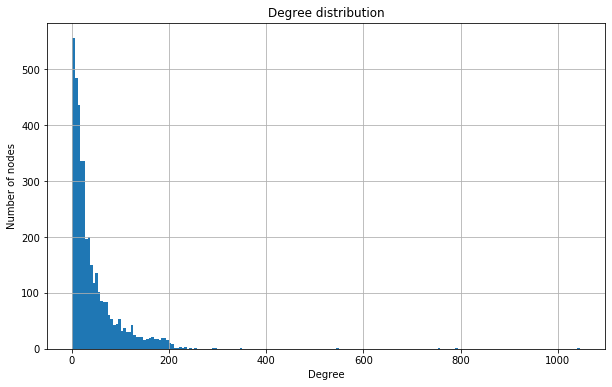

    Given the above plot and computed percentiles, we see a unique 
    mode around the median of  25.0 degrees, with rather fat tails.

 Generate a sorted list of connected components, largest first:  [4039]


,degree centrality (%)
0,0.085934
1,0.004210
2,0.002476
3,0.004210
4,0.002476
...,...
4034,0.000495
4035,0.000248
4036,0.000495
4037,0.000991


In [130]:
def compute_specs(graph: nx.Graph()):
    nb_nodes = graph.order()
    nb_edges = graph.size() 
    avg_degree  = 2*nb_edges / nb_nodes
    
    print('[nb_nodes, nb_edges, avg_degree]: ',[nb_nodes, nb_edges, avg_degree])
    
    # networkx.Graph.degree(): This object provides an iterator for (node, degree) 
    # as well as lookup for the degree for a single node.
    network_degrees = dict(ntw.degree()) 
    s = pd.Series(network_degrees, name='degrees') # create series out of network_degrees dict
    degrees_df = pd.DataFrame(s)

    range_percentiles = [0.05, 0.99]

    # compute summary statistics, 5th and 99th percentiles
    summary_stats = pd.concat([degrees_df.describe(), degrees_df.quantile(range_percentiles)]) 
    display(summary_stats)
    
    print('''    We notice from the above summary statistics that we have on 
    average a degree of ''', np.around(summary_stats.loc['mean'].values[0],2), '''
    with a median at ''', summary_stats.loc['50%'].values[0], '''degrees, 
    highlighting the effect of a high standard deviation of ''', 
    np.around(summary_stats.loc['std'].values[0],2)
    )

    hist = plt.hist(x = network_degrees.values(), bins = 200) # compute histogram of degrees in 200 bins
    plt.xlabel('Degree')
    plt.ylabel('Number of nodes')
    plt.title('Degree distribution')
    plt.show()

    print('''    Given the above plot and computed percentiles, we see a unique 
    mode around the median of ''', summary_stats.loc['50%'].values[0], '''degrees, with rather fat tails.'''
    )
    
    # nx.connected_components(nx.Graph()): 
    # Returns: A generator of sets of nodes, one for each component of graph.
    
    components = nx.connected_components(graph)
    
    print( '\n Generate a sorted list of connected components, largest first: ',
          [len(c) for c in sorted(components, key=len, reverse=True)])
    
    
    # nx.degree_centrality(nx.Graph()): Compute the degree centrality for nodes.
    # The degree centrality for a node v is the fraction of nodes it is connected to.
    # The degree centrality values are normalized by dividing by the maximum possible 
    # degree in a simple graph n-1 where n is the number of nodes in G.
    
    degree_centrality = nx.degree_centrality(graph)
    s = pd.Series(degree_centrality, name='degree centrality (%)') 
    degrees_centrality_df = pd.DataFrame(s)
    degrees_centrality_df.sort_values(by = 'degree centrality (%)', ascending=False)
    display(degrees_centrality_df)

    
    
compute_specs(ntw)